### Data Mining with Weka (Week 5)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

from sklearn.linear_model import LinearRegression


from pycaret.regression import *

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

np.random.seed(123)

In [2]:
reg = pd.read_csv("regression_outliers.csv")

In [3]:
reg

,year,phone calls
0,50,0.44
1,51,0.47
2,52,0.47
3,53,0.59
4,54,0.66
5,55,0.73
6,56,0.81
7,57,0.88
8,58,1.06
9,59,1.20


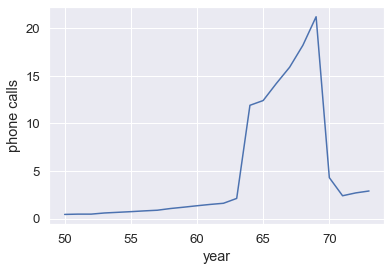

In [10]:
sns.lineplot(x='year',y='phone calls', data=reg);

In [8]:
X = reg['year']
y = reg['phone calls']

In [9]:
model = LinearRegression()

In [11]:
labor = pd.read_csv("labor.csv")

In [12]:
labor

,duration,wage-increase-first-year,wage-increase-second-year,wage-increase-third-year,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan,class
0,1,5,?,?,?,40,?,?,2,?,11,average,?,?,yes,?,good
1,2,4.5,5.8,?,?,35,ret_allw,?,?,yes,11,below_average,?,full,?,full,good
2,?,?,?,?,?,38,empl_contr,?,5,?,11,generous,yes,half,yes,half,good
3,3,3.7,4,5,tc,?,?,?,?,yes,?,?,?,?,yes,?,good
4,3,4.5,4.5,5,?,40,?,?,?,?,12,average,?,half,yes,half,good
5,2,2,2.5,?,?,35,?,?,6,yes,12,average,?,?,?,?,good
6,3,4,5,5,tc,?,empl_contr,?,?,?,12,generous,yes,none,yes,half,good
7,3,6.9,4.8,2.3,?,40,?,?,3,?,12,below_average,?,?,?,?,good
8,2,3,7,?,?,38,?,12,25,yes,11,below_average,yes,half,yes,?,good
9,1,5.7,?,?,none,40,empl_contr,?,4,?,11,generous,yes,full,?,?,good


In [13]:
from pycaret.classification import *

In [14]:
exp_clf1= setup(data = labor, target = 'class', session_id=123) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"bad: 0, good: 1"
3,Original Data,"(57, 17)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,16
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [15]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.75,0.7500,0.5000,1.0000,0.6667,0.50
1,0.75,0.7500,1.0000,0.6667,0.8000,0.50
2,0.75,0.7500,0.5000,1.0000,0.6667,0.50
3,0.75,0.7500,1.0000,0.6667,0.8000,0.50
4,0.75,0.5000,1.0000,0.7500,0.8571,0.00
5,1.00,1.0000,1.0000,1.0000,1.0000,1.00
6,0.75,0.5000,1.0000,0.7500,0.8571,0.00
7,0.75,0.8333,0.6667,1.0000,0.8000,0.50
8,0.75,0.5000,1.0000,0.7500,0.8571,0.00
9,1.00,1.0000,1.0000,1.0000,1.0000,1.00


In [16]:
labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   duration                        57 non-null     object
 1   wage-increase-first-year        57 non-null     object
 2   wage-increase-second-year       57 non-null     object
 3   wage-increase-third-year        57 non-null     object
 4   cost-of-living-adjustment       57 non-null     object
 5   working-hours                   57 non-null     object
 6   pension                         57 non-null     object
 7   standby-pay                     57 non-null     object
 8   shift-differential              57 non-null     object
 9   education-allowance             57 non-null     object
 10  statutory-holidays              57 non-null     object
 11  vacation                        57 non-null     object
 12  longterm-disability-assistance  57 non-null     obje